# Preprocesament de les dades 

Obtenemos la información de las columnas del txt adjunto y nombramos los encabezados de las columnas con los datos indicados.

- CRIM: tasa de criminalidad per cápita por ciudad
- ZN: proporción de suelo residencial con parcelas de más de 25.000 pies cuadrados.
- INDUS: proporción de acres comerciales no minoristas por ciudad
- CHAS: variable ficticia del río Charles (= 1 si el tramo linda con el río; 0 en caso contrario)
- NOX: concentración de óxidos nítricos (partes por 10 millones)
- RM: número medio de habitaciones por vivienda
- EDAD: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- DIS: distancias ponderadas a cinco centros de empleo de Boston
- RAD: índice de accesibilidad a las autopistas radiales
- TAX: tipo del impuesto sobre bienes inmuebles por cada 10.000 $.
- PTRATIO: ratio alumnos-profesor por ciudad
- B: 1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad
- LSTAT: % Status más bajo de la población
- MEDV: valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

Cargamos el archivo.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(r'housing data.csv', names=colnames, header=None)
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905,0.02985,0.08829,0.14455,0.21124,0.17004,...,0.2896,0.26838,0.23912,0.17783,0.22438,0.06263,0.04527,0.06076,0.10959,0.04741
ZN,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.50000,12.50000,12.50000,12.50000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000,2.18000,7.87000,7.87000,7.87000,7.87000,...,9.6900,9.69000,9.69000,9.69000,9.69000,11.93000,11.93000,11.93000,11.93000,11.93000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800,0.45800,0.52400,0.52400,0.52400,0.52400,...,0.5850,0.58500,0.58500,0.58500,0.58500,0.57300,0.57300,0.57300,0.57300,0.57300
RM,6.57500,6.42100,7.18500,6.99800,7.14700,6.43000,6.01200,6.17200,5.63100,6.00400,...,5.3900,5.79400,6.01900,5.56900,6.02700,6.59300,6.12000,6.97600,6.79400,6.03000
AGE,65.20000,78.90000,61.10000,45.80000,54.20000,58.70000,66.60000,96.10000,100.00000,85.90000,...,72.9000,70.60000,65.30000,73.50000,79.70000,69.10000,76.70000,91.00000,89.30000,80.80000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220,6.06220,5.56050,5.95050,6.08210,6.59210,...,2.7986,2.89270,2.40910,2.39990,2.49820,2.47860,2.28750,2.16750,2.38890,2.50500
RAD,1.00000,2.00000,2.00000,3.00000,3.00000,3.00000,5.00000,5.00000,5.00000,5.00000,...,6.0000,6.00000,6.00000,6.00000,6.00000,1.00000,1.00000,1.00000,1.00000,1.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000,222.00000,311.00000,311.00000,311.00000,311.00000,...,391.0000,391.00000,391.00000,391.00000,391.00000,273.00000,273.00000,273.00000,273.00000,273.00000


Mostramos la primeras filas del dataframe

In [81]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Obersvamos que las columnas están bien categorizadas

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Buscamos datos duplicados y los sumamos

In [83]:
df.duplicated().sum()

0

Utilizamos el describe para tener un resumen de la estadistica descriptiva general de los equipos de fútbol. Las columnas numericas del dataframe son cantidad de muestras, media, desviación estándar, valor mínimo, valor máximo, mediana y los valores correspondientes a los percentiles 25% y 75%.

Podemos observar que variable CHAS solo tiene 2 variables; 0 y 1, lo que nos indica que es una variable categórica. Lo mismo sucede con RAD, en este caso, va de 0 a 24 según el indice/grado de accesibilidad a la autopista.

In [84]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Utilizamos la función nunique para contar el número de valores del dataset.

In [85]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

Vemos en detalle los valores de las variables categoricas CHAS y RAD.

In [86]:
df['CHAS'].unique()

array([0, 1], dtype=int64)

In [87]:
df['RAD'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

### Test Shapiro

Planteamos la hipotesis
- hipotesis nula H0: tiende a una distribución normal
- hipotesis alternativa H1: no tiende a una distribución normal


- Si Pvalor >= 0.05(nivel de signficación)-->No Rho
- Si Pvalor < 0.05 (nivel de significacion)-->Rho

In [88]:
from scipy.stats import shapiro

#Inicializamos las listas
distribucion_normal = []
distribucion_no_normal = []

for i, (name, dtype) in enumerate(zip(df.columns, df.dtypes)):
    if dtype == 'int64' or dtype == 'float64':
        stat, p = shapiro(df[name])
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('{} se distribuyen como una normal'.format(name))
            distribucion_normal.append(name)
        else:
            print('{} no se distribuyen como una normal'.format(name))
            distribucion_no_normal.append(name)

# Imprimimos los resultados
print('\nLas siguientes variables no se distribuyen como una normal: ', distribucion_no_normal)
print('\nLas siguiente variables se distribuyen como una normal: ', distribucion_normal)

stat=0.450, p=0.000
CRIM no se distribuyen como una normal
stat=0.556, p=0.000
ZN no se distribuyen como una normal
stat=0.900, p=0.000
INDUS no se distribuyen como una normal
stat=0.275, p=0.000
CHAS no se distribuyen como una normal
stat=0.936, p=0.000
NOX no se distribuyen como una normal
stat=0.961, p=0.000
RM no se distribuyen como una normal
stat=0.892, p=0.000
AGE no se distribuyen como una normal
stat=0.903, p=0.000
DIS no se distribuyen como una normal
stat=0.680, p=0.000
RAD no se distribuyen como una normal
stat=0.815, p=0.000
TAX no se distribuyen como una normal
stat=0.904, p=0.000
PTRATIO no se distribuyen como una normal
stat=0.477, p=0.000
B no se distribuyen como una normal
stat=0.937, p=0.000
LSTAT no se distribuyen como una normal
stat=0.917, p=0.000
MEDV no se distribuyen como una normal

Las siguientes variables no se distribuyen como una normal:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Las siguient

#### Clasificamos las columnas entre outliers y no outliers. 

In [89]:
outliers_diccionario = {}  # Un diccionario para almacenar las columnas clasificadas como outliers o no outliers

for columna in df.columns:
    # Asignamos los valores a los cuartiles
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)

    # rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Calcular los límites para los bigotes
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Identificar los outliers
    outliers = df[(df[columna] < lower_limit) | (df[columna] > upper_limit)]

    # Clasificar la columna como outliers o no outliers
    if outliers.empty:
        outliers_diccionario[columna] = 'No Outliers'
    else:
        outliers_diccionario[columna] = 'Outliers'

# Imprimir la clasificación
for columna, clasificacion in outliers_diccionario.items():
    print(f'{columna}: {clasificacion}')

CRIM: Outliers
ZN: Outliers
INDUS: No Outliers
CHAS: Outliers
NOX: No Outliers
RM: Outliers
AGE: No Outliers
DIS: Outliers
RAD: No Outliers
TAX: No Outliers
PTRATIO: Outliers
B: Outliers
LSTAT: Outliers
MEDV: Outliers


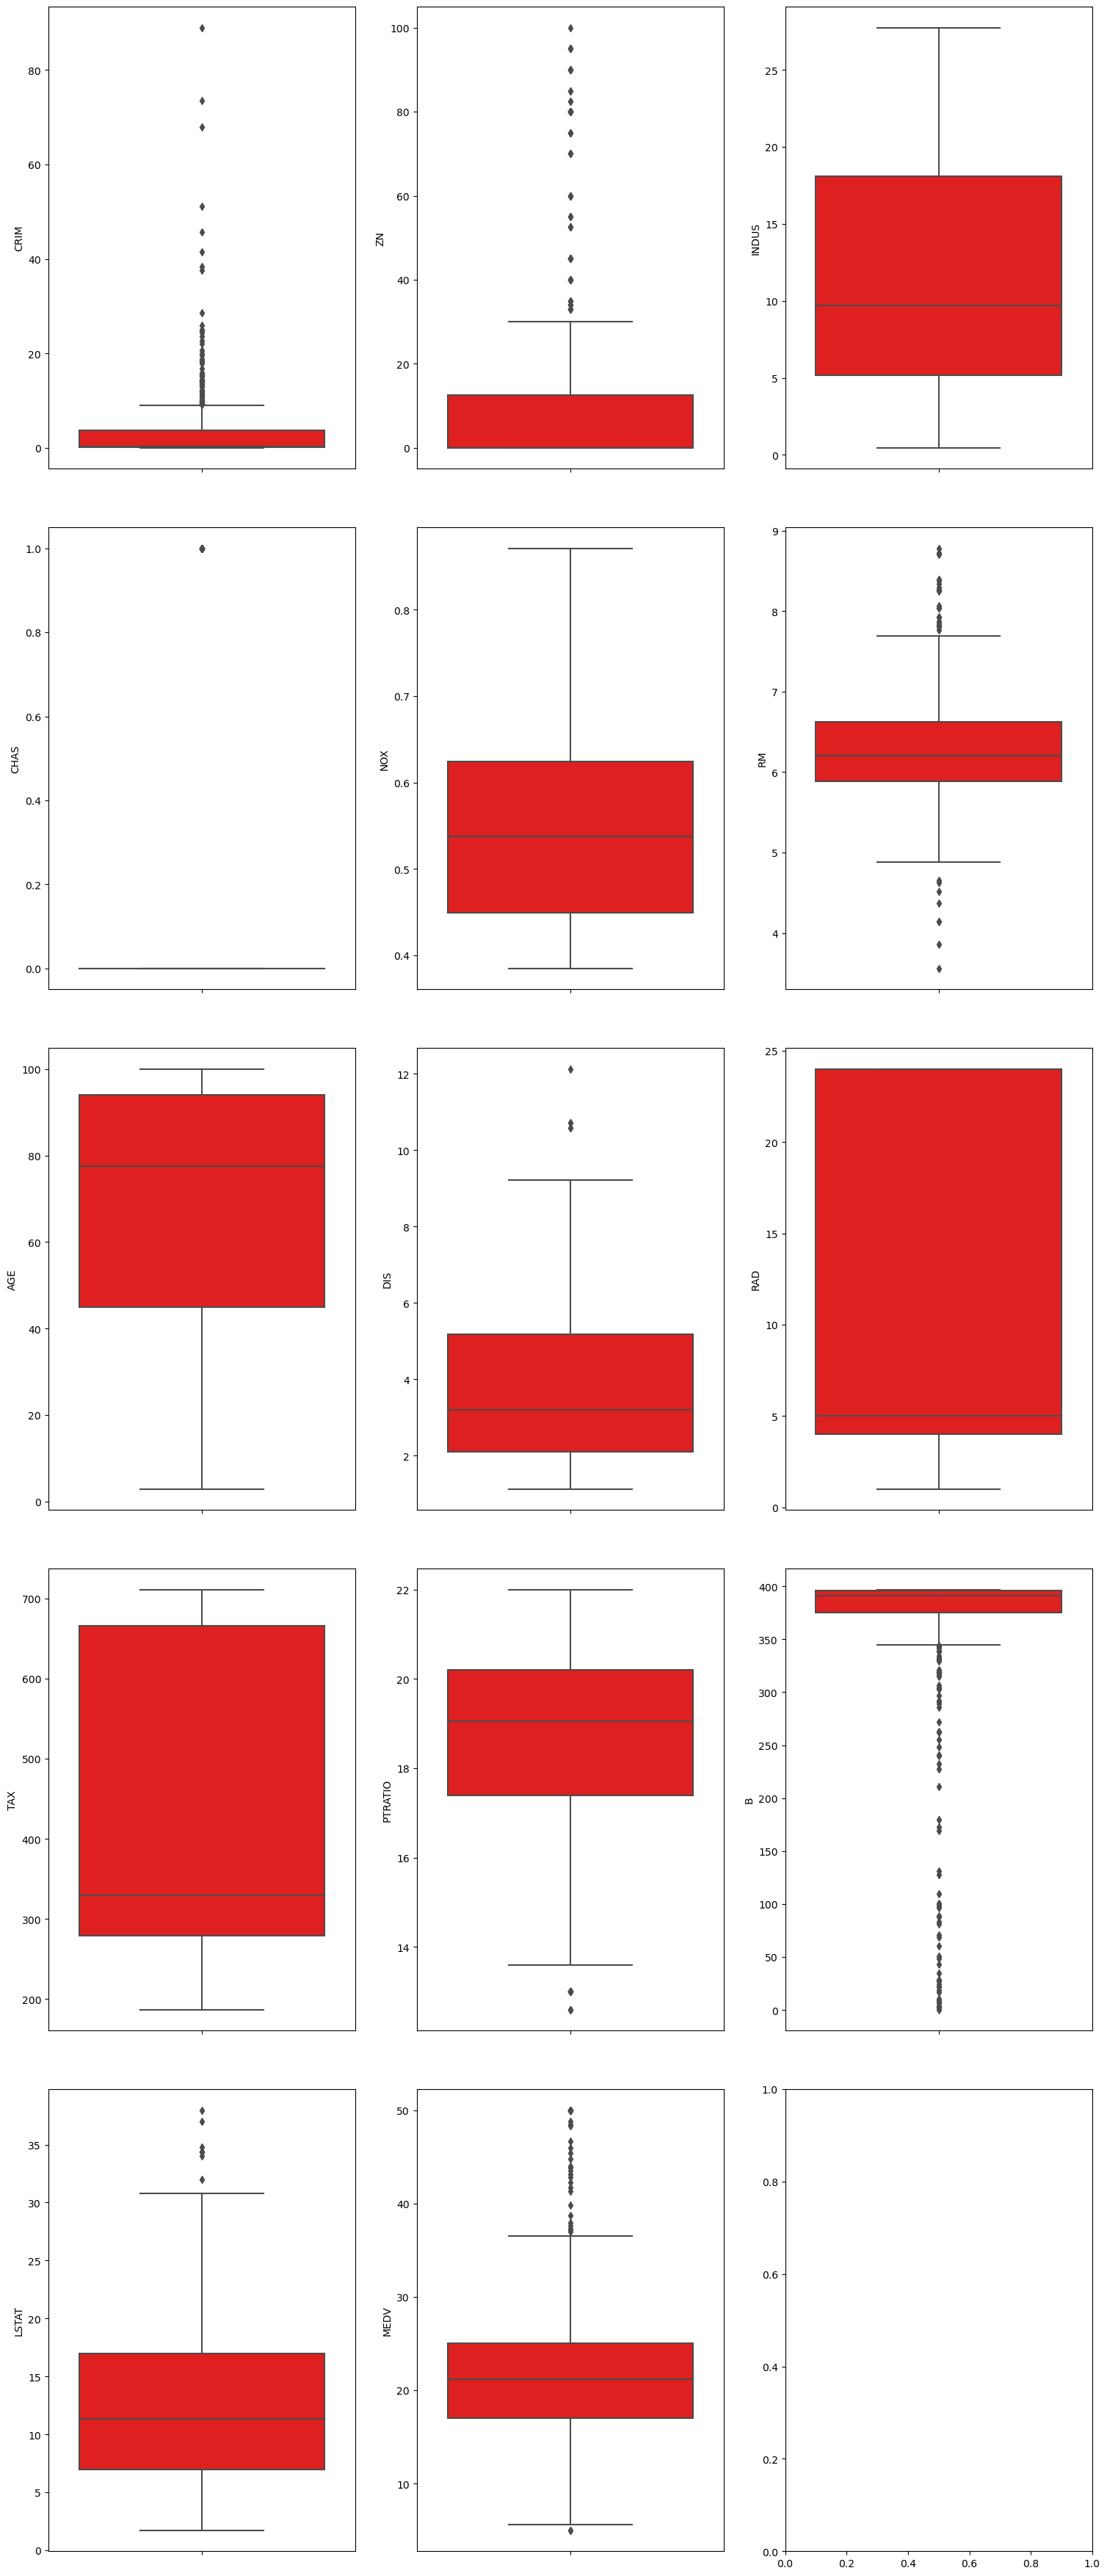

In [90]:
#Graficamos
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(15, 35))
i = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[i], color = 'r')
    i += 1
plt.tight_layout(pad=0.4, w_pad=2, h_pad=5.0)

plt.show()

La columna RAD no muestra outliers y CHAS es binaria (0,1)

#### Transformaciones

In [91]:
df = pd.get_dummies(data = df, columns= ['RAD'])
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905,0.02985,0.08829,0.14455,0.21124,0.17004,...,0.2896,0.26838,0.23912,0.17783,0.22438,0.06263,0.04527,0.06076,0.10959,0.04741
ZN,18.0,0.0,0.0,0.0,0.0,0.0,12.5,12.5,12.5,12.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INDUS,2.31,7.07,7.07,2.18,2.18,2.18,7.87,7.87,7.87,7.87,...,9.69,9.69,9.69,9.69,9.69,11.93,11.93,11.93,11.93,11.93
CHAS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOX,0.538,0.469,0.469,0.458,0.458,0.458,0.524,0.524,0.524,0.524,...,0.585,0.585,0.585,0.585,0.585,0.573,0.573,0.573,0.573,0.573
RM,6.575,6.421,7.185,6.998,7.147,6.43,6.012,6.172,5.631,6.004,...,5.39,5.794,6.019,5.569,6.027,6.593,6.12,6.976,6.794,6.03
AGE,65.2,78.9,61.1,45.8,54.2,58.7,66.6,96.1,100.0,85.9,...,72.9,70.6,65.3,73.5,79.7,69.1,76.7,91.0,89.3,80.8
DIS,4.09,4.9671,4.9671,6.0622,6.0622,6.0622,5.5605,5.9505,6.0821,6.5921,...,2.7986,2.8927,2.4091,2.3999,2.4982,2.4786,2.2875,2.1675,2.3889,2.505
TAX,296.0,242.0,242.0,222.0,222.0,222.0,311.0,311.0,311.0,311.0,...,391.0,391.0,391.0,391.0,391.0,273.0,273.0,273.0,273.0,273.0
PTRATIO,15.3,17.8,17.8,18.7,18.7,18.7,15.2,15.2,15.2,15.2,...,19.2,19.2,19.2,19.2,19.2,21.0,21.0,21.0,21.0,21.0


In [92]:
#Hacemos una copia y realizamos las transformaciones
df_tr = df.copy() 

from sklearn.preprocessing import RobustScaler

var_outliers = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

scaling = RobustScaler()

Robust_scaler = scaling.fit(df_tr[var_outliers])
df_tr[var_outliers] = Robust_scaler.transform(df_tr[var_outliers])

df_tr.transpose()

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
CRIM,-0.069593,-0.063755,-0.06376,-0.062347,-0.052144,-0.063048,-0.046792,-0.031143,-0.012592,-0.024053,...,0.009204,0.003302,-0.004837,-0.021886,-0.008937,-0.05393,-0.058759,-0.05445,-0.040867,-0.058164
ZN,1.44,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INDUS,2.31,7.07,7.07,2.18,2.18,2.18,7.87,7.87,7.87,7.87,...,9.69,9.69,9.69,9.69,9.69,11.93,11.93,11.93,11.93,11.93
CHAS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOX,0.538,0.469,0.469,0.458,0.458,0.458,0.524,0.524,0.524,0.524,...,0.585,0.585,0.585,0.585,0.585,0.573,0.573,0.573,0.573,0.573
RM,0.496612,0.28794,1.323171,1.069783,1.27168,0.300136,-0.26626,-0.049458,-0.78252,-0.2771,...,-1.109079,-0.561653,-0.256775,-0.866531,-0.245935,0.521003,-0.119919,1.039973,0.79336,-0.24187
AGE,65.2,78.9,61.1,45.8,54.2,58.7,66.6,96.1,100.0,85.9,...,72.9,70.6,65.3,73.5,79.7,69.1,76.7,91.0,89.3,80.8
DIS,0.285777,0.569789,0.569789,0.924391,0.924391,0.924391,0.761936,0.888221,0.930835,1.095977,...,-0.132389,-0.101919,-0.258512,-0.261491,-0.229661,-0.236007,-0.297887,-0.336744,-0.265053,-0.227459
TAX,296.0,242.0,242.0,222.0,222.0,222.0,311.0,311.0,311.0,311.0,...,391.0,391.0,391.0,391.0,391.0,273.0,273.0,273.0,273.0,273.0
PTRATIO,-1.339286,-0.446429,-0.446429,-0.125,-0.125,-0.125,-1.375,-1.375,-1.375,-1.375,...,0.053571,0.053571,0.053571,0.053571,0.053571,0.696429,0.696429,0.696429,0.696429,0.696429


In [93]:
from sklearn.preprocessing import MinMaxScaler

var_no_outliers = ['INDUS', 'NOX', 'AGE', 'TAX']

MM_scaler = MinMaxScaler().fit(df_tr[var_no_outliers])

df_tr[var_no_outliers] = MM_scaler.transform(df_tr[var_no_outliers])

df_tr.transpose()

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
CRIM,-0.069593,-0.063755,-0.06376,-0.062347,-0.052144,-0.063048,-0.046792,-0.031143,-0.012592,-0.024053,...,0.009204,0.003302,-0.004837,-0.021886,-0.008937,-0.05393,-0.058759,-0.05445,-0.040867,-0.058164
ZN,1.44,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INDUS,0.067815,0.242302,0.242302,0.06305,0.06305,0.06305,0.271628,0.271628,0.271628,0.271628,...,0.338343,0.338343,0.338343,0.338343,0.338343,0.420455,0.420455,0.420455,0.420455,0.420455
CHAS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOX,0.314815,0.17284,0.17284,0.150206,0.150206,0.150206,0.286008,0.286008,0.286008,0.286008,...,0.411523,0.411523,0.411523,0.411523,0.411523,0.386831,0.386831,0.386831,0.386831,0.386831
RM,0.496612,0.28794,1.323171,1.069783,1.27168,0.300136,-0.26626,-0.049458,-0.78252,-0.2771,...,-1.109079,-0.561653,-0.256775,-0.866531,-0.245935,0.521003,-0.119919,1.039973,0.79336,-0.24187
AGE,0.641607,0.782698,0.599382,0.441813,0.528321,0.574665,0.656025,0.959835,1.0,0.854789,...,0.720906,0.697219,0.642636,0.727085,0.790937,0.681771,0.760041,0.907312,0.889804,0.802266
DIS,0.285777,0.569789,0.569789,0.924391,0.924391,0.924391,0.761936,0.888221,0.930835,1.095977,...,-0.132389,-0.101919,-0.258512,-0.261491,-0.229661,-0.236007,-0.297887,-0.336744,-0.265053,-0.227459
TAX,0.208015,0.104962,0.104962,0.066794,0.066794,0.066794,0.236641,0.236641,0.236641,0.236641,...,0.389313,0.389313,0.389313,0.389313,0.389313,0.164122,0.164122,0.164122,0.164122,0.164122
PTRATIO,-1.339286,-0.446429,-0.446429,-0.125,-0.125,-0.125,-1.375,-1.375,-1.375,-1.375,...,0.053571,0.053571,0.053571,0.053571,0.053571,0.696429,0.696429,0.696429,0.696429,0.696429


## Train Split

Dividimos el conjunto de datos en entrenamiento y prueba. 

In [94]:
x = df.drop("MEDV", axis=1)
y = df['MEDV'] #Será nuestra variable independiente.

print('\n',x)
print('\n',y)


         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS    TAX  PTRATIO  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  296.0     15.3   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  242.0     17.8   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  242.0     17.8   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  222.0     18.7   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  222.0     18.7   
..       ...   ...    ...   ...    ...    ...   ...     ...    ...      ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786  273.0     21.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875  273.0     21.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675  273.0     21.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889  273.0     21.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050  273.0     21.0   

     ...  LSTAT  RAD_1  RAD_2  RAD_3  RAD_4  RAD_

In [95]:
# Dividimos los datos
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=1234,
    shuffle=True
)

print('\n',x)
print('\n',y)


print('\n', x_train)
print('\n', x_test)
print('\n', y_train)
print('\n', y_test)


         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS    TAX  PTRATIO  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  296.0     15.3   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  242.0     17.8   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  242.0     17.8   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  222.0     18.7   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  222.0     18.7   
..       ...   ...    ...   ...    ...    ...   ...     ...    ...      ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786  273.0     21.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875  273.0     21.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675  273.0     21.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889  273.0     21.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050  273.0     21.0   

     ...  LSTAT  RAD_1  RAD_2  RAD_3  RAD_4  RAD_

# Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

Usamos 6 modelos de regresión.
Importamos las clases (LinearRegression, DecisionTreeRegressor, RandomForestRegressor, SVR, GradientBoostingRegressor, MLPRegressor)y la instancias (skilearn).Los entrenamos con los datos de x_train y y_train

Luego evaluamos los modelos entrenados calculando y el almacenando el coeficiente de R^2

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
svr = SVR()
gbr = GradientBoostingRegressor()
mlpr = MLPRegressor()

lr.fit(x_train, y_train)
dtr.fit(x_train, y_train)
rfr.fit(x_train, y_train)
svr.fit(x_train, y_train)
gbr.fit(x_train, y_train)
mlpr.fit(x_train, y_train)

#Evaluamos los modelos entrenados, calculando y el almacenando el coeficiente de R^2. 
models_total = [lr, dtr, rfr,svr, gbr, mlpr]

scores_list = []

for model in models_total:
    scores_list.append({model : model.score(x_test, y_test).round(3)})

scores_list

C:\Users\Outla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[{LinearRegression(): 0.757},
 {DecisionTreeRegressor(): 0.869},
 {RandomForestRegressor(): 0.916},
 {SVR(): 0.186},
 {GradientBoostingRegressor(): 0.921},
 {MLPRegressor(): 0.593}]

El moelo más adecuado es RandomForestRegressor

#### Representamos los 6 modelos de regresión

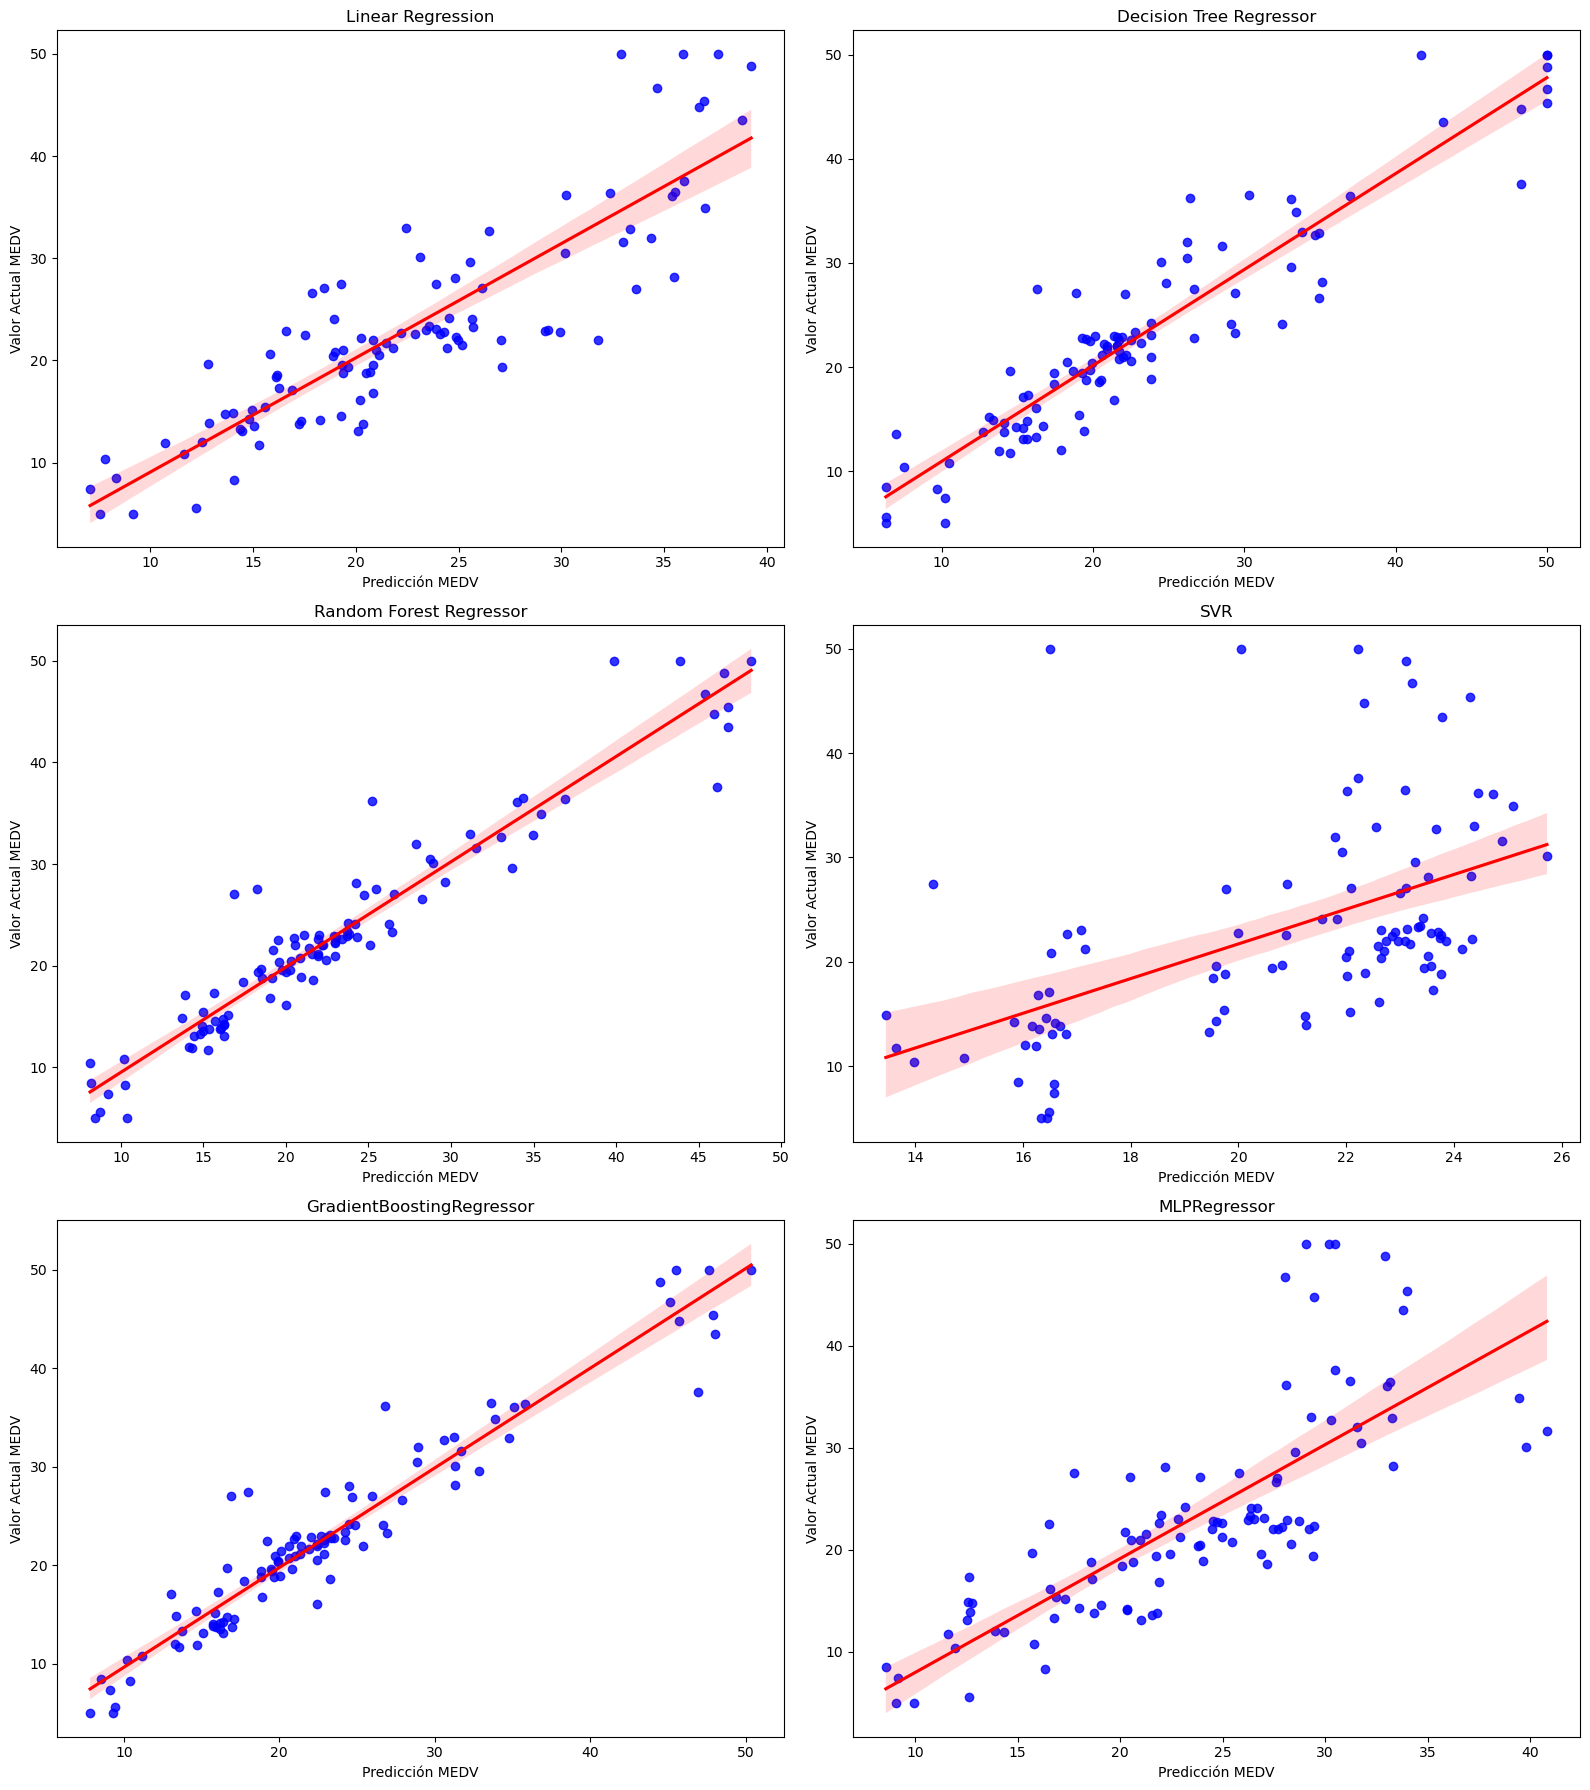

In [97]:

n_models = len(models_total)
n_rows = (n_models + 1) // 2  

# Visualización del resultado
fig, axs = plt.subplots(n_rows, 2, figsize=(16, n_rows * 6)) 
axs = axs.flatten()
model_names = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'SVR', 'GradientBoostingRegressor', 'MLPRegressor']

for i, (model, name) in enumerate(zip(models_total, model_names)):
    # Predicciones del modelo
    y_pred = model.predict(x_test)
    
    # Gráfico de dispersión con línea de regresión en el eje 
    sns.regplot(x=y_pred, y=y_test, ax=axs[i], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    axs[i].set_title(name)
    axs[i].set_xlabel('Predicción MEDV')
    axs[i].set_ylabel('Valor Actual MEDV')

if n_models % 2 != 0:
    axs[-1].set_visible(False)  
    
plt.tight_layout()
plt.show()


En los gráficos podemos observar el valor actual del precios vs la predicción. El modelo tendría un mejor ajuste si la linia es una diagonal de pendiente 1. 


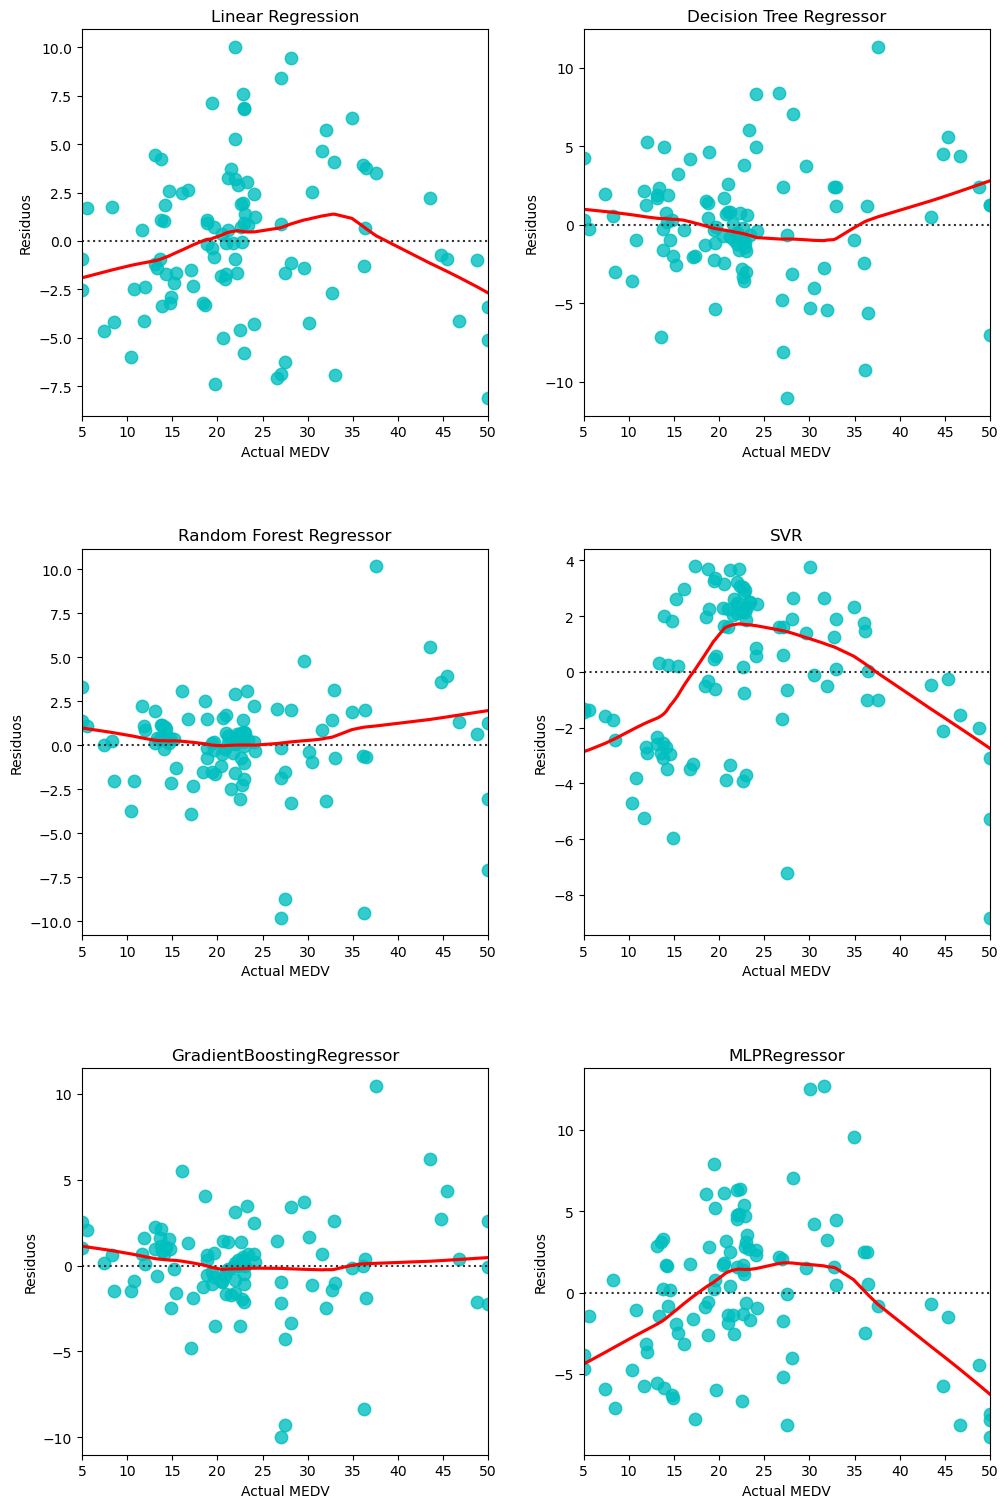

In [98]:

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15)) 

axs = axs.flatten()

# Visualización del resultado
model_names = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'SVR', 'GradientBoostingRegressor', 'MLPRegressor']


for i, (model, name) in enumerate(zip(models_total, model_names)):
    # Predicciones del modelo
    y_pred = model.predict(x_test) 

    sns.residplot(x=y_test, y=y_pred, ax=axs[i], scatter_kws={"s": 80}, color='c', lowess=True, line_kws=dict(color="r"))
    axs[i].set_title(name)
    axs[i].set_xlabel('Actual MEDV')
    axs[i].set_ylabel('Residuos')

if len(models_total) < len(axs):
    for j in range(len(models_total), len(axs)):
        axs[j].set_visible(False)

plt.tight_layout(pad=0.4, w_pad=2, h_pad=5.0)
plt.show()


Los residuos, la diferencia entre los valores de la prediccións y los reales, serían mejores si tendiera a 0.

# Exercici 2
Compara’ls en base al MSE (error cuadratico medio) i al R2(Coeficiente de determinación)

El R^2 mide el porcentaje de variación de la endogena(y) que es capaz de explicar el modelo, por lo tanto mide lo bien o mal que se ajusta a la realidad. 
0=<R^2=<1
R^2 cercano a 1, mejor ajuste
R^2 cercano a 0, mal ajuste. 


MSE nos indica la capacidad predictiva del modelo. Para que una predicción sea buena MSE deberá ser lo más pequeño posible. Por ponerle un pero, el MSE, solo se limita a la comparación entre modelos. Un indicador adimensional, como EPAM, nos podría indicar la predición sin necesidad de comparar. 

In [99]:
#Importamos librerías
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Hacemos una lista para almacenar los resultados de las métricas de cada modelo. 
r2_list = []
mse_list = []

#Iteramos sobre cada modelo, son una lista de modelos previamente entrenados. Hacemos predecciones de R2 y MSE.
for model in models_total:
    r2_list.append(r2_score(y_test, model.predict(x_test)).round(3))
    mse_list.append({model : mean_squared_error(y_test, model.predict(x_test)).round(2)})

#Imprimimos resultados
print('Coeficientes R2:')
for lst in r2_list:
    print(lst)
print('MSE:')
for lst in mse_list:
    print(lst)

Coeficientes R2:
0.757
0.869
0.916
0.186
0.921
0.593
MSE:
{LinearRegression(): 24.95}
{DecisionTreeRegressor(): 13.43}
{RandomForestRegressor(): 8.62}
{SVR(): 83.54}
{GradientBoostingRegressor(): 8.16}
{MLPRegressor(): 41.81}


El modelo que más se ajusta es RandomForestRegressor y GradientBostingRegressor, y el que presenta menos bondad de ajuste es SVR.

# Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

Importaremos Gridsearch es un método de búsqueda que toma en cuenta diferentes combinaciones de hiperparámetros y elige la combinación que arroja un margen de error más bajo.Cogeremos los 2 modelos que más se ajustan (RandomForestRegressor y GradientBoostingRegressor) y el que presenta peor ajuste

Mediante la siguiente función get.params observamos los parametros de los modelos en cuestión. Este proceso puede ser clvae
para la optimización de hiperparámetros o técnicas automatizadas, en nuestro caso, GridSearchCV

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [102]:
model_params = {
    'random_forest_regressor': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    } 
}

results = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='r2', n_jobs=-1, verbose=1)
    clf.fit(x, y) 
    results.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Outla\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
245 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Outla\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outla\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Outla\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Outla\anaconda3\Lib\site-packa

Ejecutamos el GridSearch para cada modelo y su correspondiente diccionario. Una vez acabe obtendremos una lista de los mejores parametros para cada modelo. 

In [103]:
scores_GS = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=4, return_train_score=False)
    clf.fit(x, y)
    scores_GS.append({
        'model': model_name,
        'best score': clf.best_score_,
        'best parameters': clf.best_params_})

scores_GS

C:\Users\Outla\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Outla\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outla\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Outla\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Outla\anaconda3\Lib\site-packa

[{'model': 'random_forest_regressor',
  'best score': 0.4556607319830804,
  'best parameters': {'max_depth': 30,
   'max_features': 'sqrt',
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 100}}]

In [104]:
rfr_gs = RandomForestRegressor(bootstrap=True, max_depth=None, max_features=None, n_estimators=50)

rfr_gs.fit(x_train, y_train)


RandomForestRegressor(max_features=None, n_estimators=50)

In [105]:
models_new_total = [rfr_gs]

mse_gridsearch_list = []

for model in models_new_total:
    r2_gridsearch_list= r2_score(y_test, model.predict(x_test)).round(3)
    mse_gridsearch_list.append({model : mean_squared_error(y_test, model.predict(x_test)).round(2)})

print('R2 - coficiente de determinación:')
print(r2_gridsearch_list)

print('MSE:')
for lst in mse_gridsearch_list:
    print(lst)

R2 - coficiente de determinación:
0.91
MSE:
{RandomForestRegressor(max_features=None, n_estimators=50): 9.2}


# Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

Analizaremos las regresiones de los modelos que hemos usado en apartados anteriores utilizando validación cruzada. Lo evaluaremos mediante el R^2, que mide la capacidad de los modelos como he explicado antes. 

In [106]:
#Importamos las librerías que usaremos en este ejercicio.
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score

#Creamos una lista de instancias y una lista de los nombres correspondientes (models_names)
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), SVR(), GradientBoostingRegressor(), MLPRegressor()]
model_names = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'SVR', 'GradientBoostingRegressor', 'MLPRegressor']

#Validación cruzada donde cogemos el 20% (Test_size) del modelo
cv = ShuffleSplit(n_splits=6, test_size=0.2, random_state=0)

#Diccionario 
cv_scores = {}


# Evaluamos el modelo actual mediante cross_val_score. Iteraramos sobre cada modelo y su nombre correspondiente
for model, name in zip(models, model_names):
    scores = cross_val_score(model, x, y, cv=cv, scoring='r2')
    cv_scores[name] = {
        "media": scores.mean().round(3),
        "std": scores.std().round(3)
    }

# Imprimimos el resultado
print('R2 - coficiente de determinación:')
print(cv_scores)
    
    

C:\Users\Outla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 - coficiente de determinación:
{'Linear Regression': {'media': 0.708, 'std': 0.082}, 'Decision Tree Regressor': {'media': 0.702, 'std': 0.105}, 'Random Forest Regressor': {'media': 0.849, 'std': 0.05}, 'SVR': {'media': 0.181, 'std': 0.117}, 'GradientBoostingRegressor': {'media': 0.872, 'std': 0.052}, 'MLPRegressor': {'media': 0.431, 'std': 0.158}}


Gráfico de media

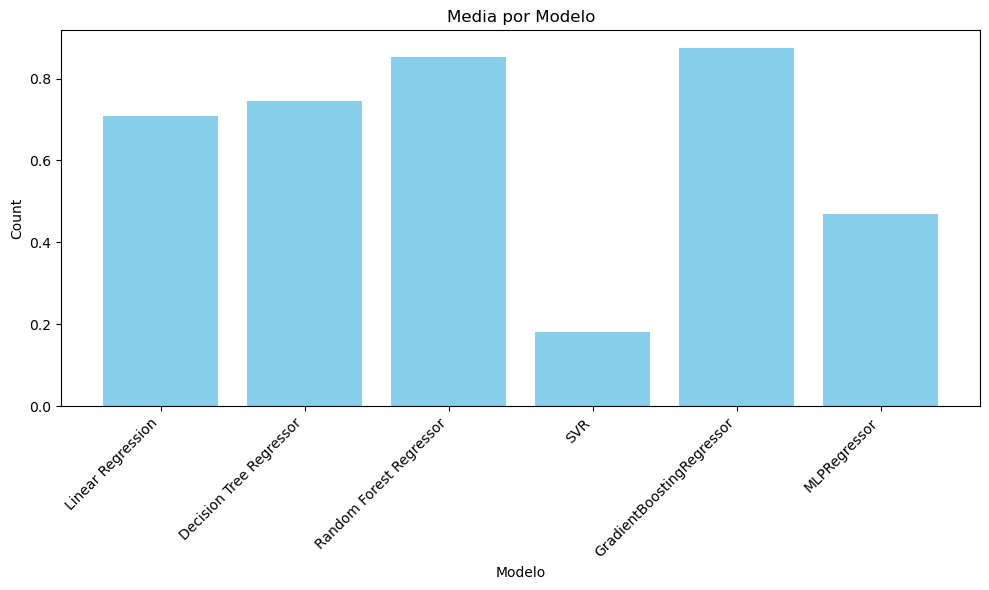

In [107]:
# Datos
cv_scores = {
    'Linear Regression': {'media': 0.708, 'std': 0.082},
    'Decision Tree Regressor': {'media': 0.745, 'std': 0.066},
    'Random Forest Regressor': {'media': 0.852, 'std': 0.055},
    'SVR': {'media': 0.181, 'std': 0.117},
    'GradientBoostingRegressor': {'media': 0.874, 'std': 0.049},
    'MLPRegressor': {'media': 0.469, 'std': 0.092}
}

# nombres de modelo, medias y STDs
model_names = list(cv_scores.keys())
means = [cv_scores[model]['media'] for model in model_names]

#histograma para la media
plt.figure(figsize=(10, 6))
plt.bar(model_names, means, color='skyblue')
plt.xlabel('Modelo')
plt.ylabel('Count')
plt.title('Media por Modelo')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Gráfico de std

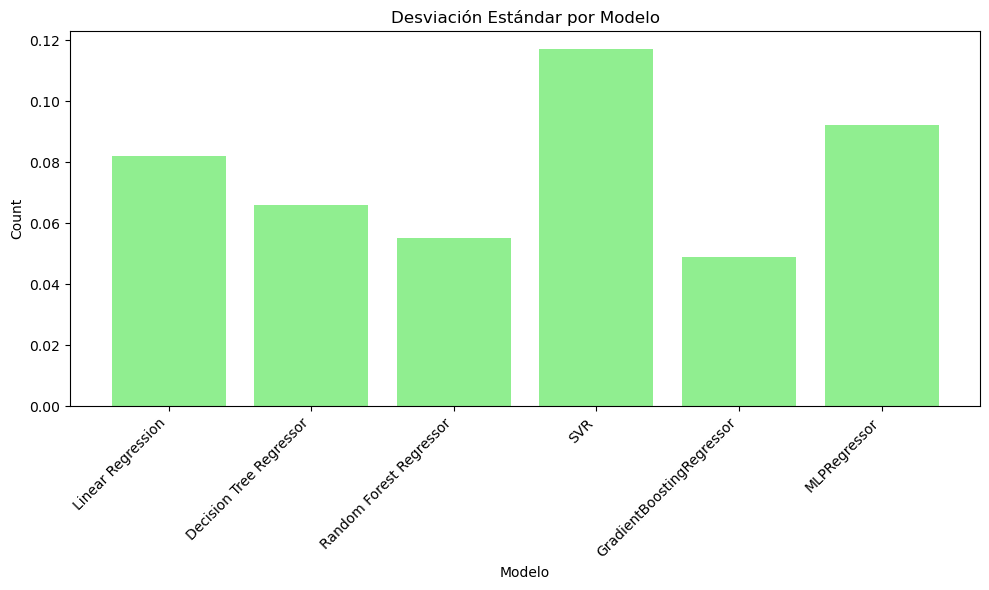

In [108]:
# Extracción de STDs
stds = [cv_scores[model]['std'] for model in model_names]

# histograma para la STD
plt.figure(figsize=(10, 6))
plt.bar(model_names, stds, color='lightgreen')
plt.xlabel('Modelo')
plt.ylabel('Count')
plt.title('Desviación Estándar por Modelo')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Realizamos la validación cruzada y obtenemos resultados más bajos en comparación al apartado anterior. Lo podemos justificar debido a que el modelo ofrece una perspectiva más realista y matizada de su capacidad predectiva. 

El modelo que mejor se ajusta GradientBoostingRegressor': {'media': 0.874, 'std': 0.049} debido a que presenta una media alta en referencia al resto de modelos(Cuanto más cercano esté este valor a 1, mejor será el modelo en términos de ajuste) que es capaz de explicar una gran proporción de la variabilidad de la variable dependiente a partir de las variables independientes. 

Por la parte de la STD, nos indica que el rendimiento del modelo es consistente a través de las diferentes particiones de validación cruzada.

# Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

Al eliminar la variable RM (número medio de habitaciones por vivienda) el modelo puede que pierda capacidad de predicción, porque una de las caracteristicas que tenemos al valor el precio de una vivienda es el número de habitaciones. 

In [109]:
x_train_noRM = x_train.copy()
x_test_noRM = x_test.copy()

x_train_noRM.drop('RM', axis = 1, inplace=True)
x_test_noRM.drop('RM', axis = 1, inplace=True)


In [110]:
x_noRM = df_tr.drop(['MEDV', 'RM'], axis=1)
y_noRM = df_tr['MEDV']

x_noRM_train, x_noRM_test, y_noRM_train, y_noRM_test = train_test_split(x_noRM, y_noRM, test_size=0.2, random_state=1)

In [111]:
lr_noRM = LinearRegression()
dtr_noRM = DecisionTreeRegressor()
rfr_noRM = RandomForestRegressor()
svr_noRM = SVR()
gbr_noRM = GradientBoostingRegressor()
mlpr_noRM = MLPRegressor()

lr_noRM.fit(x_noRM_train, y_noRM_train)
dtr_noRM.fit(x_noRM_train, y_noRM_train)
rfr_noRM.fit(x_noRM_train, y_noRM_train)
svr_noRM.fit(x_noRM_train, y_noRM_train)
gbr_noRM.fit(x_noRM_train, y_noRM_train)
mlpr_noRM.fit(x_noRM_train, y_noRM_train)


#Evaluamos los modelos entrenados, calculando y el almacenando el coeficiente de R^2
models_total_noRM = [lr_noRM, dtr_noRM, rfr_noRM, svr_noRM, gbr_noRM, mlpr_noRM]
model_names = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'SVR', 'GradientBoostingRegressor', 'MLPRegressor']

noRM_r2_list = []
noRM_mse_list = []

for model, name in zip(models_total_noRM, model_names):
    noRM_r2_list.append({name: r2_score(y_noRM_test, model.predict(x_noRM_test)).round(3)})
    noRM_mse_list.append({name: mean_squared_error(y_noRM_test, model.predict(x_noRM_test)).round(2)})

print('R2-coficiente de determinación:')
for lst in noRM_r2_list:
    print(lst)

print('MSE:')
for lst in noRM_mse_list:
    print(lst)

R2-coficiente de determinación:
{'Linear Regression': 0.68}
{'Decision Tree Regressor': 0.643}
{'Random Forest Regressor': 0.838}
{'SVR': 0.405}
{'GradientBoostingRegressor': 0.82}
{'MLPRegressor': 0.521}
MSE:
{'Linear Regression': 31.67}
{'Decision Tree Regressor': 35.29}
{'Random Forest Regressor': 15.99}
{'SVR': 58.84}
{'GradientBoostingRegressor': 17.79}
{'MLPRegressor': 47.29}


C:\Users\Outla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Si comparamos los resultados que recoge R2, la capacidad predictiva del modelo, observamos que son diferentes en los 4 ejercicios que hemos realizado. En este apartado, el modelo que mejor bondad de ajuste tiene es el RandomForestRegressor y GradientBoostingRegressor

In [112]:
r2_list

[0.757, 0.869, 0.916, 0.186, 0.921, 0.593]

In [113]:
df_scores= pd.DataFrame({'Modelos':['LinearRegression',
'DecisionTreeRegressor',
'RandomForestRegressor',
'SVR',
'GradientBoostingRegressor',
'MLPRegressor'
                                    
], "R2":r2_list})

In [114]:
df_scores['Mejores parametros.rfr']=r2_gridsearch_list

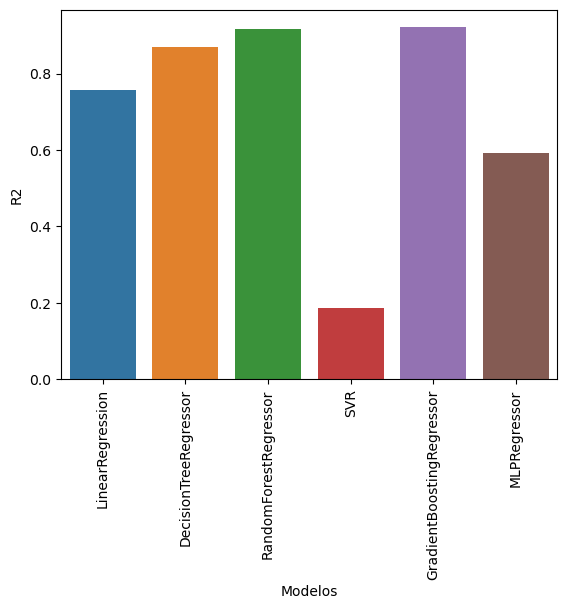

In [115]:
sns.barplot(data=df_scores, x='Modelos', y='R2')
plt.xticks (rotation=90);